In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load historical stock data
aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AAPL_historical_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\TSLA_historical_data.csv', parse_dates=['Date'], index_col='Date')
amzn_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AMZN_historical_data.csv', parse_dates=['Date'], index_col='Date')
goog_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\GOOG_historical_data.csv', parse_dates=['Date'], index_col='Date')


In [2]:
# Dictionary of stocks
stocks = {'AAPL': aapl_data, 'TSLA': tsla_data, 'AMZN': amzn_data, 'GOOG': goog_data}
results = {}


#cumulative daily_returns 

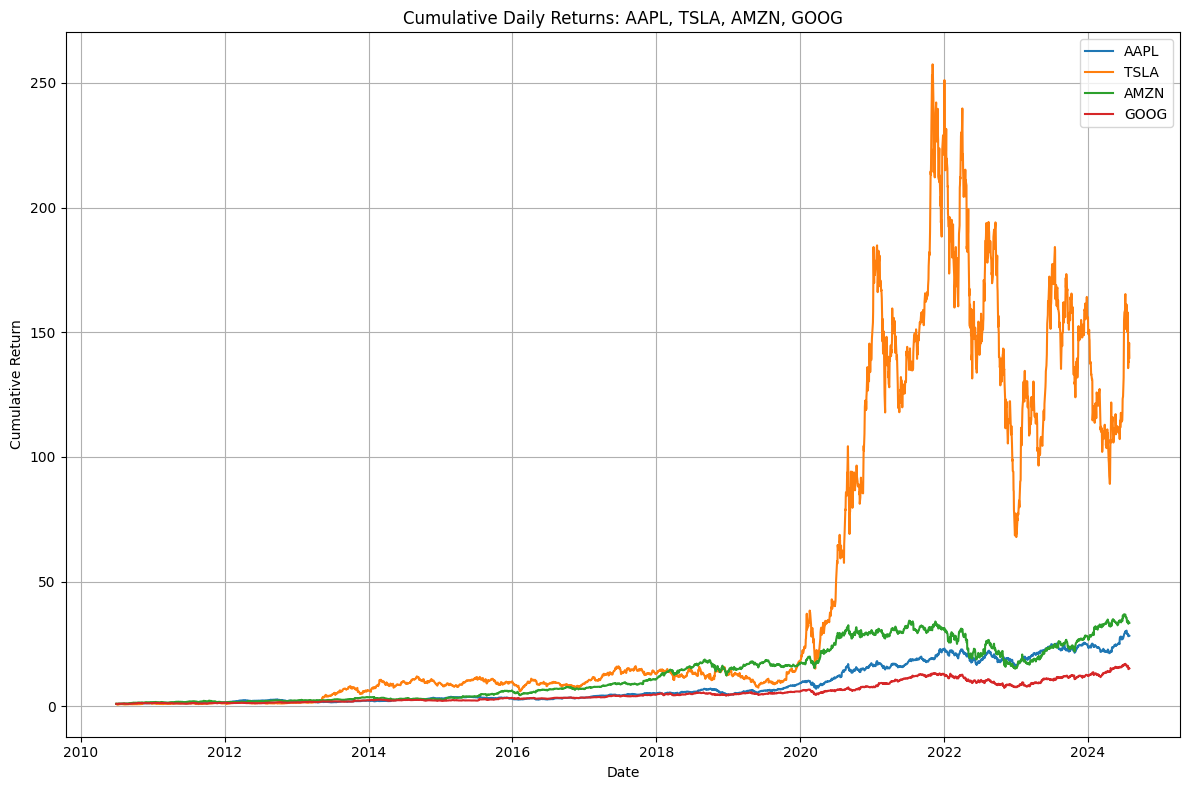

In [3]:


# Load data from your CSV files (update paths accordingly)
aapl_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AAPL_historical_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\TSLA_historical_data.csv', parse_dates=['Date'], index_col='Date')
amzn_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\AMZN_historical_data.csv', parse_dates=['Date'], index_col='Date')
goog_data = pd.read_csv(r'C:\Users\Antifragile\Documents\stock-analysis\data\GOOG_historical_data.csv', parse_dates=['Date'], index_col='Date')
# Extract Adjusted Close or Close prices (adjust column name if needed)
combined_data = pd.DataFrame({
    'AAPL': aapl_data['Adj Close'],
    'TSLA': tsla_data['Adj Close'],
    'AMZN': amzn_data['Adj Close'],
    'GOOG': goog_data['Adj Close']
})

# Drop rows with any missing data
combined_data.dropna(inplace=True)

# Calculate daily percentage returns
daily_returns = combined_data.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 8))
for stock in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)

plt.title('Cumulative Daily Returns: AAPL, TSLA, AMZN, GOOG')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


AAPL Sharpe Ratio: 0.57
TSLA Sharpe Ratio: 0.87
AMZN Sharpe Ratio: 0.73
GOOG Sharpe Ratio: 0.78


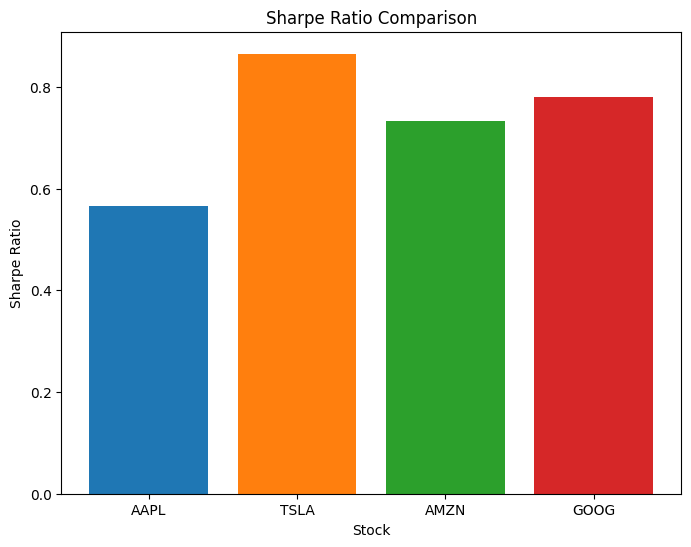

In [4]:

# Calculate Sharpe Ratio (risk-free rate = 2%)
risk_free_rate = 0.02
for stock, data in stocks.items():
    data['Daily_Return'] = data['Close'].pct_change()
    avg_daily_return = data['Daily_Return'].mean()
    std_daily_return = data['Daily_Return'].std()
    annualized_return = avg_daily_return * 252
    annualized_std = std_daily_return * np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std if annualized_std != 0 else 0
    results[stock] = sharpe_ratio

# Print results
for stock, sharpe in results.items():
    print(f"{stock} Sharpe Ratio: {sharpe:.2f}")

# Plot Sharpe Ratios
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Sharpe Ratio Comparison')
plt.xlabel('Stock')
plt.ylabel('Sharpe Ratio')
plt.show()

#Daily return Distribution

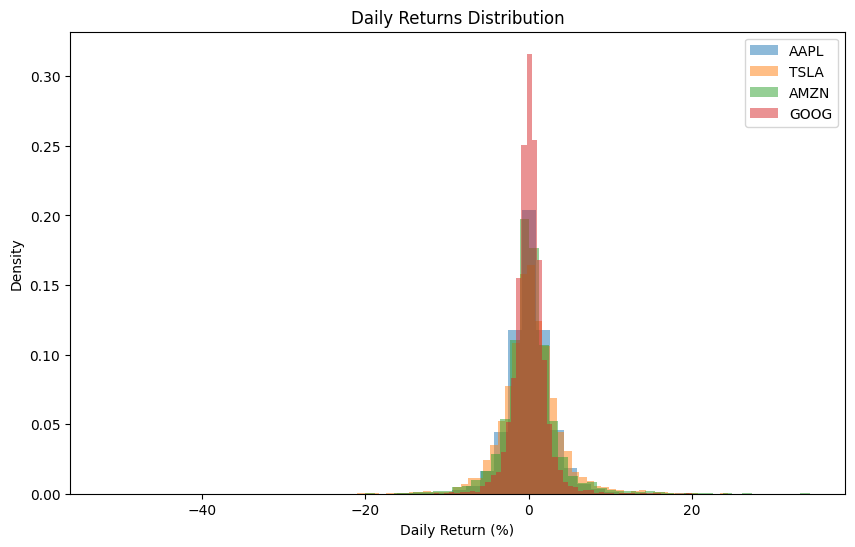

In [5]:
for stock, data in stocks.items():
    data['Daily_Return'] = data['Close'].pct_change() * 100
    results[stock] = {'Daily_Return': data['Daily_Return']}

plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.hist(results[stock]['Daily_Return'].dropna(), bins=50, alpha=0.5, label=stock, density=True)
plt.title('Daily Returns Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Density')
plt.legend()
plt.show()

#Moving Averages – Trend Identification

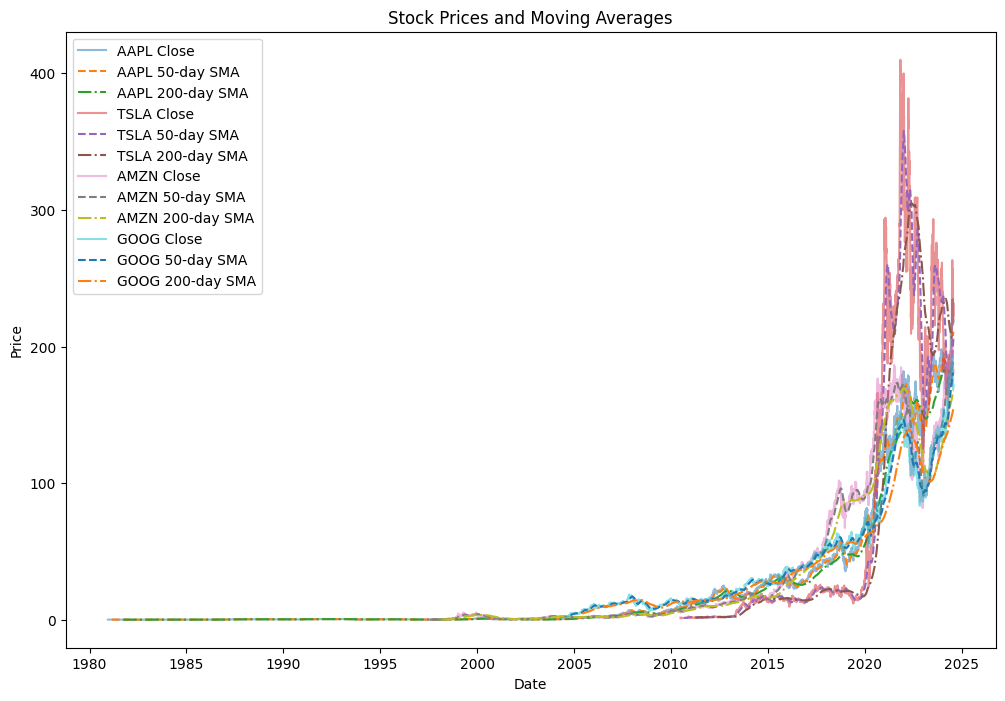

In [6]:
for stock, data in stocks.items():
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 8))
for stock, data in stocks.items():
    plt.plot(data.index, data['Close'], label=f'{stock} Close', alpha=0.5)
    plt.plot(data.index, data['SMA_50'], label=f'{stock} 50-day SMA', linestyle='--')
    plt.plot(data.index, data['SMA_200'], label=f'{stock} 200-day SMA', linestyle='-.')
plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Buy/Sell Signal Strategy

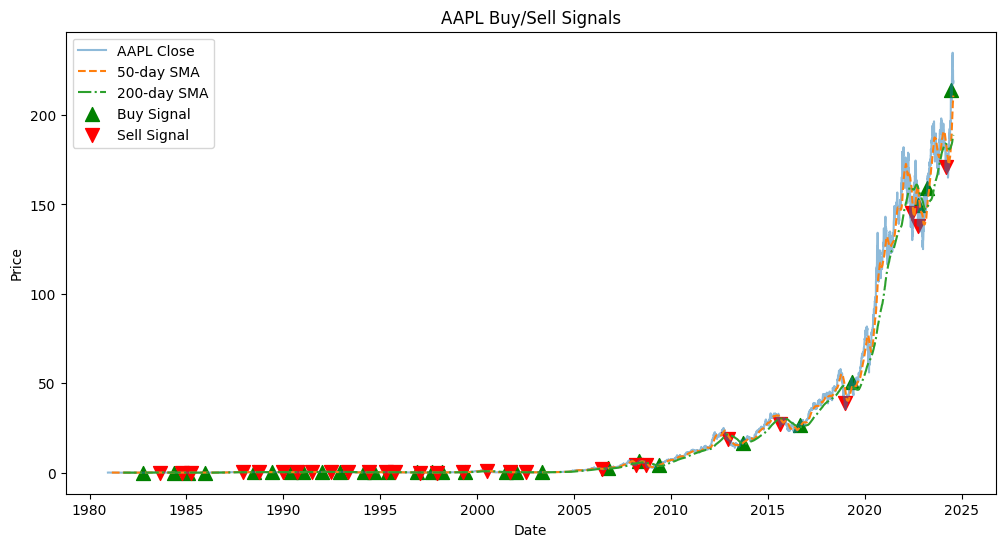

In [13]:
for stock, data in stocks.items():
    data['Signal'] = 0
    data.loc[data.index[50:], 'Signal'] = np.where(
        data['SMA_50'][50:] > data['SMA_200'][50:], 1, 0
    )
    data['Position'] = data['Signal'].diff()

# Plot for AAPL as an example
plt.figure(figsize=(12, 6))
plt.plot(stocks['AAPL'].index, stocks['AAPL']['Close'], label='AAPL Close', alpha=0.5)
plt.plot(stocks['AAPL'].index, stocks['AAPL']['SMA_50'], label='50-day SMA', linestyle='--')
plt.plot(stocks['AAPL'].index, stocks['AAPL']['SMA_200'], label='200-day SMA', linestyle='-.')
buy_signals = stocks['AAPL'][stocks['AAPL']['Position'] == 1]
sell_signals = stocks['AAPL'][stocks['AAPL']['Position'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal', s=100)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal', s=100)
plt.title('AAPL Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Drawdown Analysis

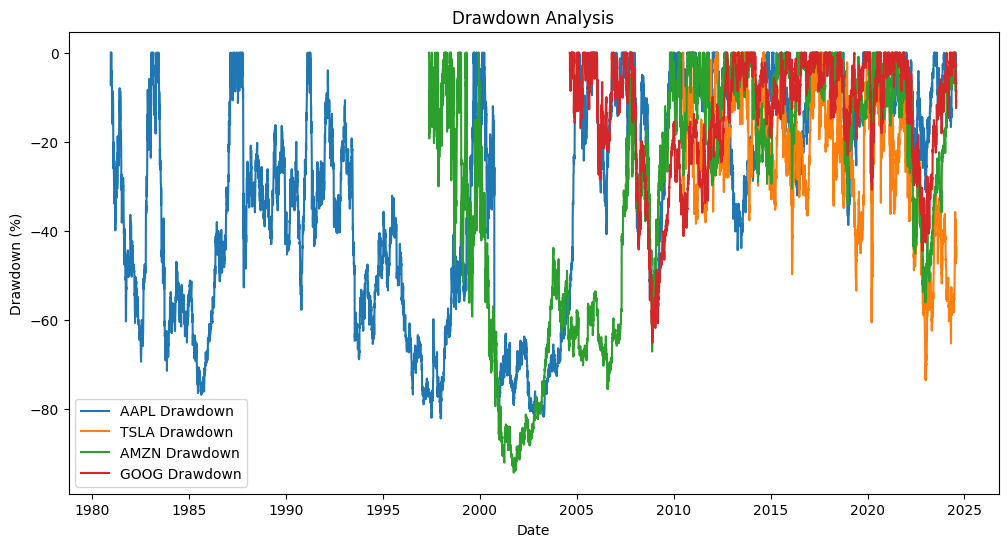

In [8]:
for stock, data in stocks.items():
    data['Cumulative_Return'] = (1 + data['Daily_Return'] / 100).cumprod()
    data['Rolling_Max'] = data['Cumulative_Return'].cummax()
    data['Drawdown'] = (data['Cumulative_Return'] - data['Rolling_Max']) / data['Rolling_Max'] * 100
    results[stock]['Max_Drawdown'] = data['Drawdown'].min()

plt.figure(figsize=(12, 6))
for stock, data in stocks.items():
    plt.plot(data.index, data['Drawdown'], label=f'{stock} Drawdown')
plt.title('Drawdown Analysis')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.show()

 #Compound Annual Growth Rate (CAGR)

In [9]:
for stock, data in stocks.items():
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    years = (data.index[-1] - data.index[0]).days / 365.25
    cagr = ((end_price / start_price) ** (1 / years) - 1) * 100
    results[stock]['CAGR'] = cagr

#MACD Analysis – Momentum Insights

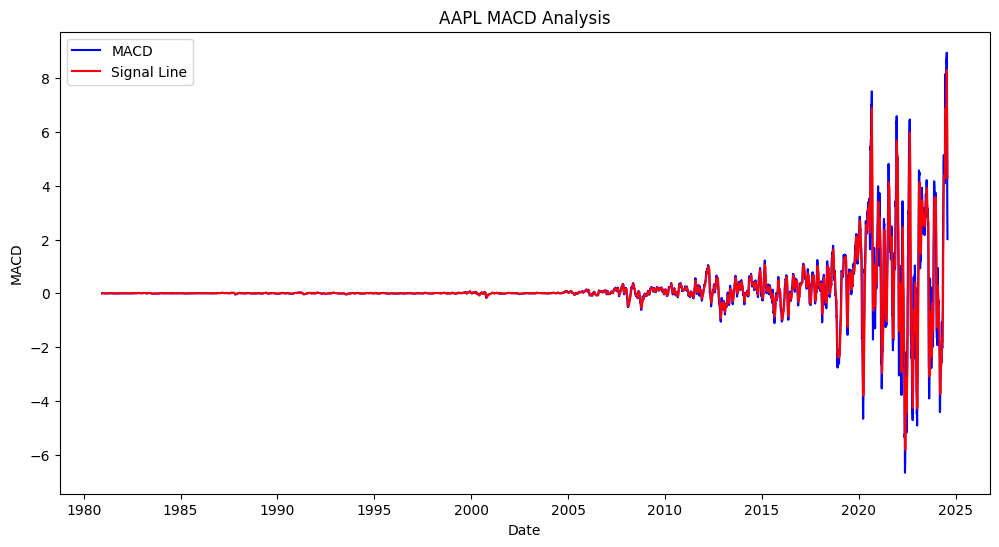

In [10]:
for stock, data in stocks.items():
    exp1 = data['Close'].ewm(span=12, adjust=False).mean()
    exp2 = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = exp1 - exp2
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot for AAPL as an example
plt.figure(figsize=(12, 6))
plt.plot(stocks['AAPL'].index, stocks['AAPL']['MACD'], label='MACD', color='b')
plt.plot(stocks['AAPL'].index, stocks['AAPL']['Signal_Line'], label='Signal Line', color='r')
plt.title('AAPL MACD Analysis')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

#20-day SMA – Short-Term Trend

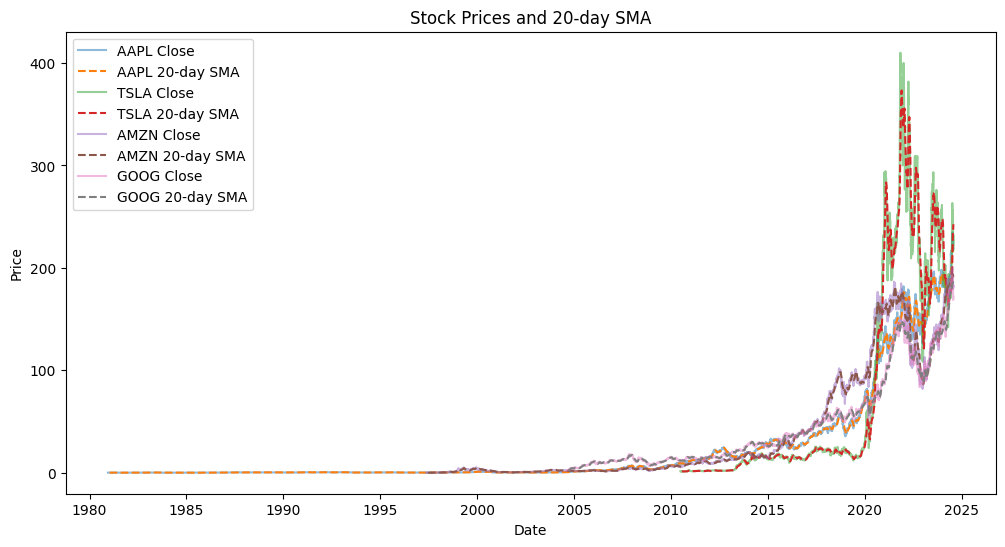

In [11]:
for stock, data in stocks.items():
    data['SMA_20'] = data['Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
for stock, data in stocks.items():
    plt.plot(data.index, data['Close'], label=f'{stock} Close', alpha=0.5)
    plt.plot(data.index, data['SMA_20'], label=f'{stock} 20-day SMA', linestyle='--')
plt.title('Stock Prices and 20-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


AAPL Analysis:
Max Drawdown: -82.22%
CAGR: 18.60%

TSLA Analysis:
Max Drawdown: -73.63%
CAGR: 42.01%

AMZN Analysis:
Max Drawdown: -94.40%
CAGR: 31.86%

GOOG Analysis:
Max Drawdown: -65.29%
CAGR: 23.63%


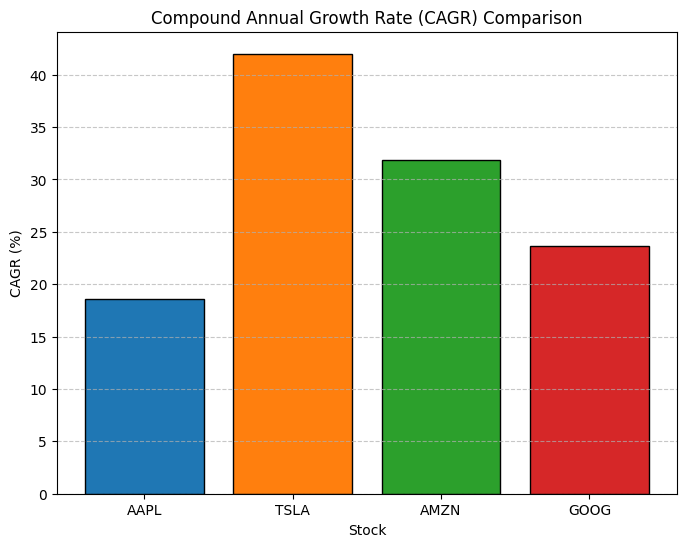

In [14]:
# Print summary
for stock, metrics in results.items():
    print(f"\n{stock} Analysis:")
    print(f"Max Drawdown: {metrics['Max_Drawdown']:.2f}%")
    print(f"CAGR: {metrics['CAGR']:.2f}%")

# Plot CAGR Comparison
stocks_list = ["AAPL", "TSLA", "AMZN", "GOOG"]
cagr_values = [results[stock]['CAGR'] for stock in stocks_list]

plt.figure(figsize=(8, 6))
plt.bar(stocks_list, cagr_values, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], edgecolor='black')
plt.title("Compound Annual Growth Rate (CAGR) Comparison")
plt.xlabel("Stock")
plt.ylabel("CAGR (%)")
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()